In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns

In [10]:
data_train = pd.read_csv('Data/LR/train.csv')
data_test = pd.read_csv('Data/LR/test.csv')

In [11]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
data_train.dropna(axis=1,thresh=1400,inplace=True)

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

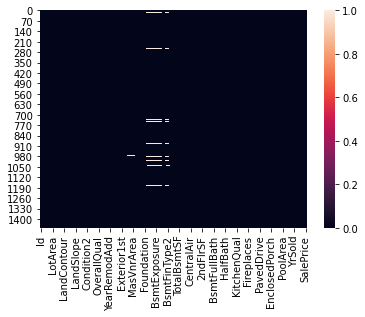

In [15]:
sns.heatmap(data_train.isnull())

In [16]:
data_train.dropna(how='any',inplace=True)

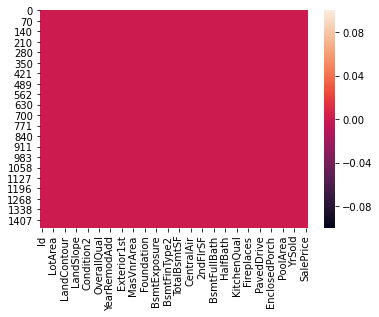

In [17]:
sns.heatmap(data_train.isnull())

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1412 non-null   int64  
 1   MSSubClass     1412 non-null   int64  
 2   MSZoning       1412 non-null   object 
 3   LotArea        1412 non-null   int64  
 4   Street         1412 non-null   object 
 5   LotShape       1412 non-null   object 
 6   LandContour    1412 non-null   object 
 7   Utilities      1412 non-null   object 
 8   LotConfig      1412 non-null   object 
 9   LandSlope      1412 non-null   object 
 10  Neighborhood   1412 non-null   object 
 11  Condition1     1412 non-null   object 
 12  Condition2     1412 non-null   object 
 13  BldgType       1412 non-null   object 
 14  HouseStyle     1412 non-null   object 
 15  OverallQual    1412 non-null   int64  
 16  OverallCond    1412 non-null   int64  
 17  YearBuilt      1412 non-null   int64  
 18  YearRemo

In [19]:
data_train.shape

(1412, 70)

In [20]:
encode = LabelEncoder()


In [21]:
features_index = [2,4,5,6,7,8,9,10,11,12,13,14,19,20,21,22,23,25,26,27,28,29,30,31,33,37,38,39,40,51,53,57,67,68]
for feature in features_index:
    data_train.iloc[:, feature] = encode.fit_transform(data_train.iloc[:, feature])

In [22]:
data_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [23]:
X,Y = data_train.drop('SalePrice',axis=1),data_train['SalePrice']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [25]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [26]:
metrics.mean_absolute_error(Y_test,Y_pred)

20880.374480284816

In [27]:
metrics.mean_squared_error(Y_test,Y_pred)

1752310647.6327202

In [28]:
useful_col = X_train.columns

In [29]:
data_test = data_test[useful_col]

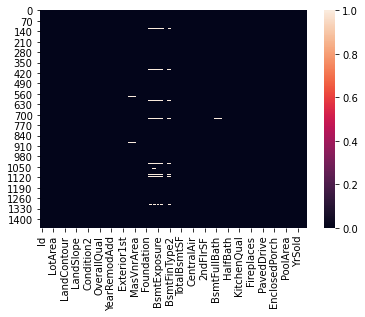

In [30]:
sns.heatmap(data_test.isnull())

In [31]:
data_test.dropna(how='any',inplace=True)

In [32]:
features_index = [2,4,5,6,7,8,9,10,11,12,13,14,19,20,21,22,23,25,26,27,28,29,30,31,33,37,38,39,40,51,53,57,67,68]
for feature in features_index:
    data_test.iloc[:, feature] = encode.fit_transform(data_test.iloc[:, feature])

In [34]:
test_pred = reg.predict(data_test)

In [35]:
test_pred

array([122690.56485741, 157848.9593058 , 168048.73246587, ...,
       153159.06463657, 111217.84877329, 224045.83502325])